Este material é de uso exclusivo dos estudantes matriculados na disciplina MAC110 do IME-USP. O material ainda está em desenvolvimento. Qualquer reprodução, distribuição ou compartilhamento, integral ou parcial, fora do âmbito da disciplina, sem autorização expressa dos autores, é proibido. Todos os direitos reservados.

Por gentileza, nos ajude a melhorar o livro! Isso ajudará aos estudantes atuais e futuros. Encontrou erros? Achou partes confusas? Está faltando algo? Como podemos melhorar? Basta preencher o formulário aqui: https://forms.gle/qVw5UGF2gWBAtnk49



## upload do hd local

Saving BRICS_ExpectativaDeVida_1960-2022_2casas.csv to BRICS_ExpectativaDeVida_1960-2022_2casas (3).csv


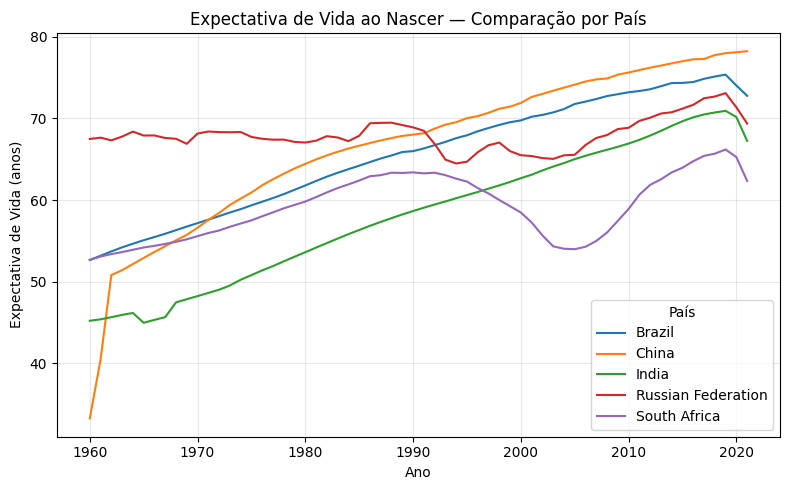

Amostra dos dados (formato longo):


,Country Name,Ano,ExpectativaDeVida
0,Brazil,1960,52.66
1,China,1960,33.28
2,India,1960,45.22
3,Russian Federation,1960,67.47
4,South Africa,1960,52.67
5,Brazil,1961,53.18
6,China,1961,40.47
7,India,1961,45.40
8,Russian Federation,1961,67.63
9,South Africa,1961,53.08


In [4]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

def main():
  print('Exemplo de dados disponível em https://github.com/rmcesarjr/iccd/blob/main/data/BRICS_ExpectativaDeVida_1960-2022.csv')
  uploaded = files.upload()
  filename = next(iter(uploaded))

  df_wide = pd.read_csv(filename, sep=";")

  year_cols = [c for c in df_wide.columns if c.isdigit()]
  df_long = df_wide.melt(
      id_vars=["Country Name"],
      value_vars=year_cols,
      var_name="Ano",
      value_name="ExpectativaDeVida"
  )
  df_long["Ano"] = df_long["Ano"].astype(int)
  df_long["ExpectativaDeVida"] = pd.to_numeric(df_long["ExpectativaDeVida"], errors="coerce")
  df_long = df_long.dropna(subset=["ExpectativaDeVida"])

  paises_str = "Brazil, China, India, Russian Federation, South Africa"
  paises = [p.strip() for p in paises_str.split(",") if p.strip()]

  df_plot = df_long[df_long["Country Name"].isin(paises)]

  plt.figure(figsize=(8, 5))
  for country in paises:
      sub = df_plot[df_plot["Country Name"] == country]
      if not sub.empty:
          plt.plot(sub["Ano"], sub["ExpectativaDeVida"], label=country)

  plt.title("Expectativa de Vida ao Nascer — Comparação por País")
  plt.xlabel("Ano")
  plt.ylabel("Expectativa de Vida (anos)")
  plt.grid(True, alpha=0.3)
  plt.legend(title="País")
  plt.tight_layout()
  plt.show()

  print("Amostra dos dados (formato longo):")
  display(df_plot.head(10))

main()